<a href="https://colab.research.google.com/github/VishardMehta/Traffic-sign-Yolo/blob/main/yolov8n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os

if 'COLAB_GPU' in os.environ:
  print("GPU is enabled")
else:
  print("GPU is not enabled")

GPU is enabled


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00


In [7]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.7/112.6 GB disk)


In [8]:
%pwd

'/content'

In [9]:
!mkdir RoadSignDetection

In [10]:
os.chdir("/content/RoadSignDetection")

In [11]:
%pwd

'/content/RoadSignDetection'

In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LK4qXeI57vSTdn5hhL69")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:01<00:00, 9102.40it/s] 


In [13]:
os.chdir("/content/RoadSignDetection/Self-Driving-Cars-6")

In [14]:
!yolo task = detect mode = train model = yolov8s.pt data =data.yaml epochs = 10 imgsz = 640 batch=16

Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

In [16]:
!ls '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train'


args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


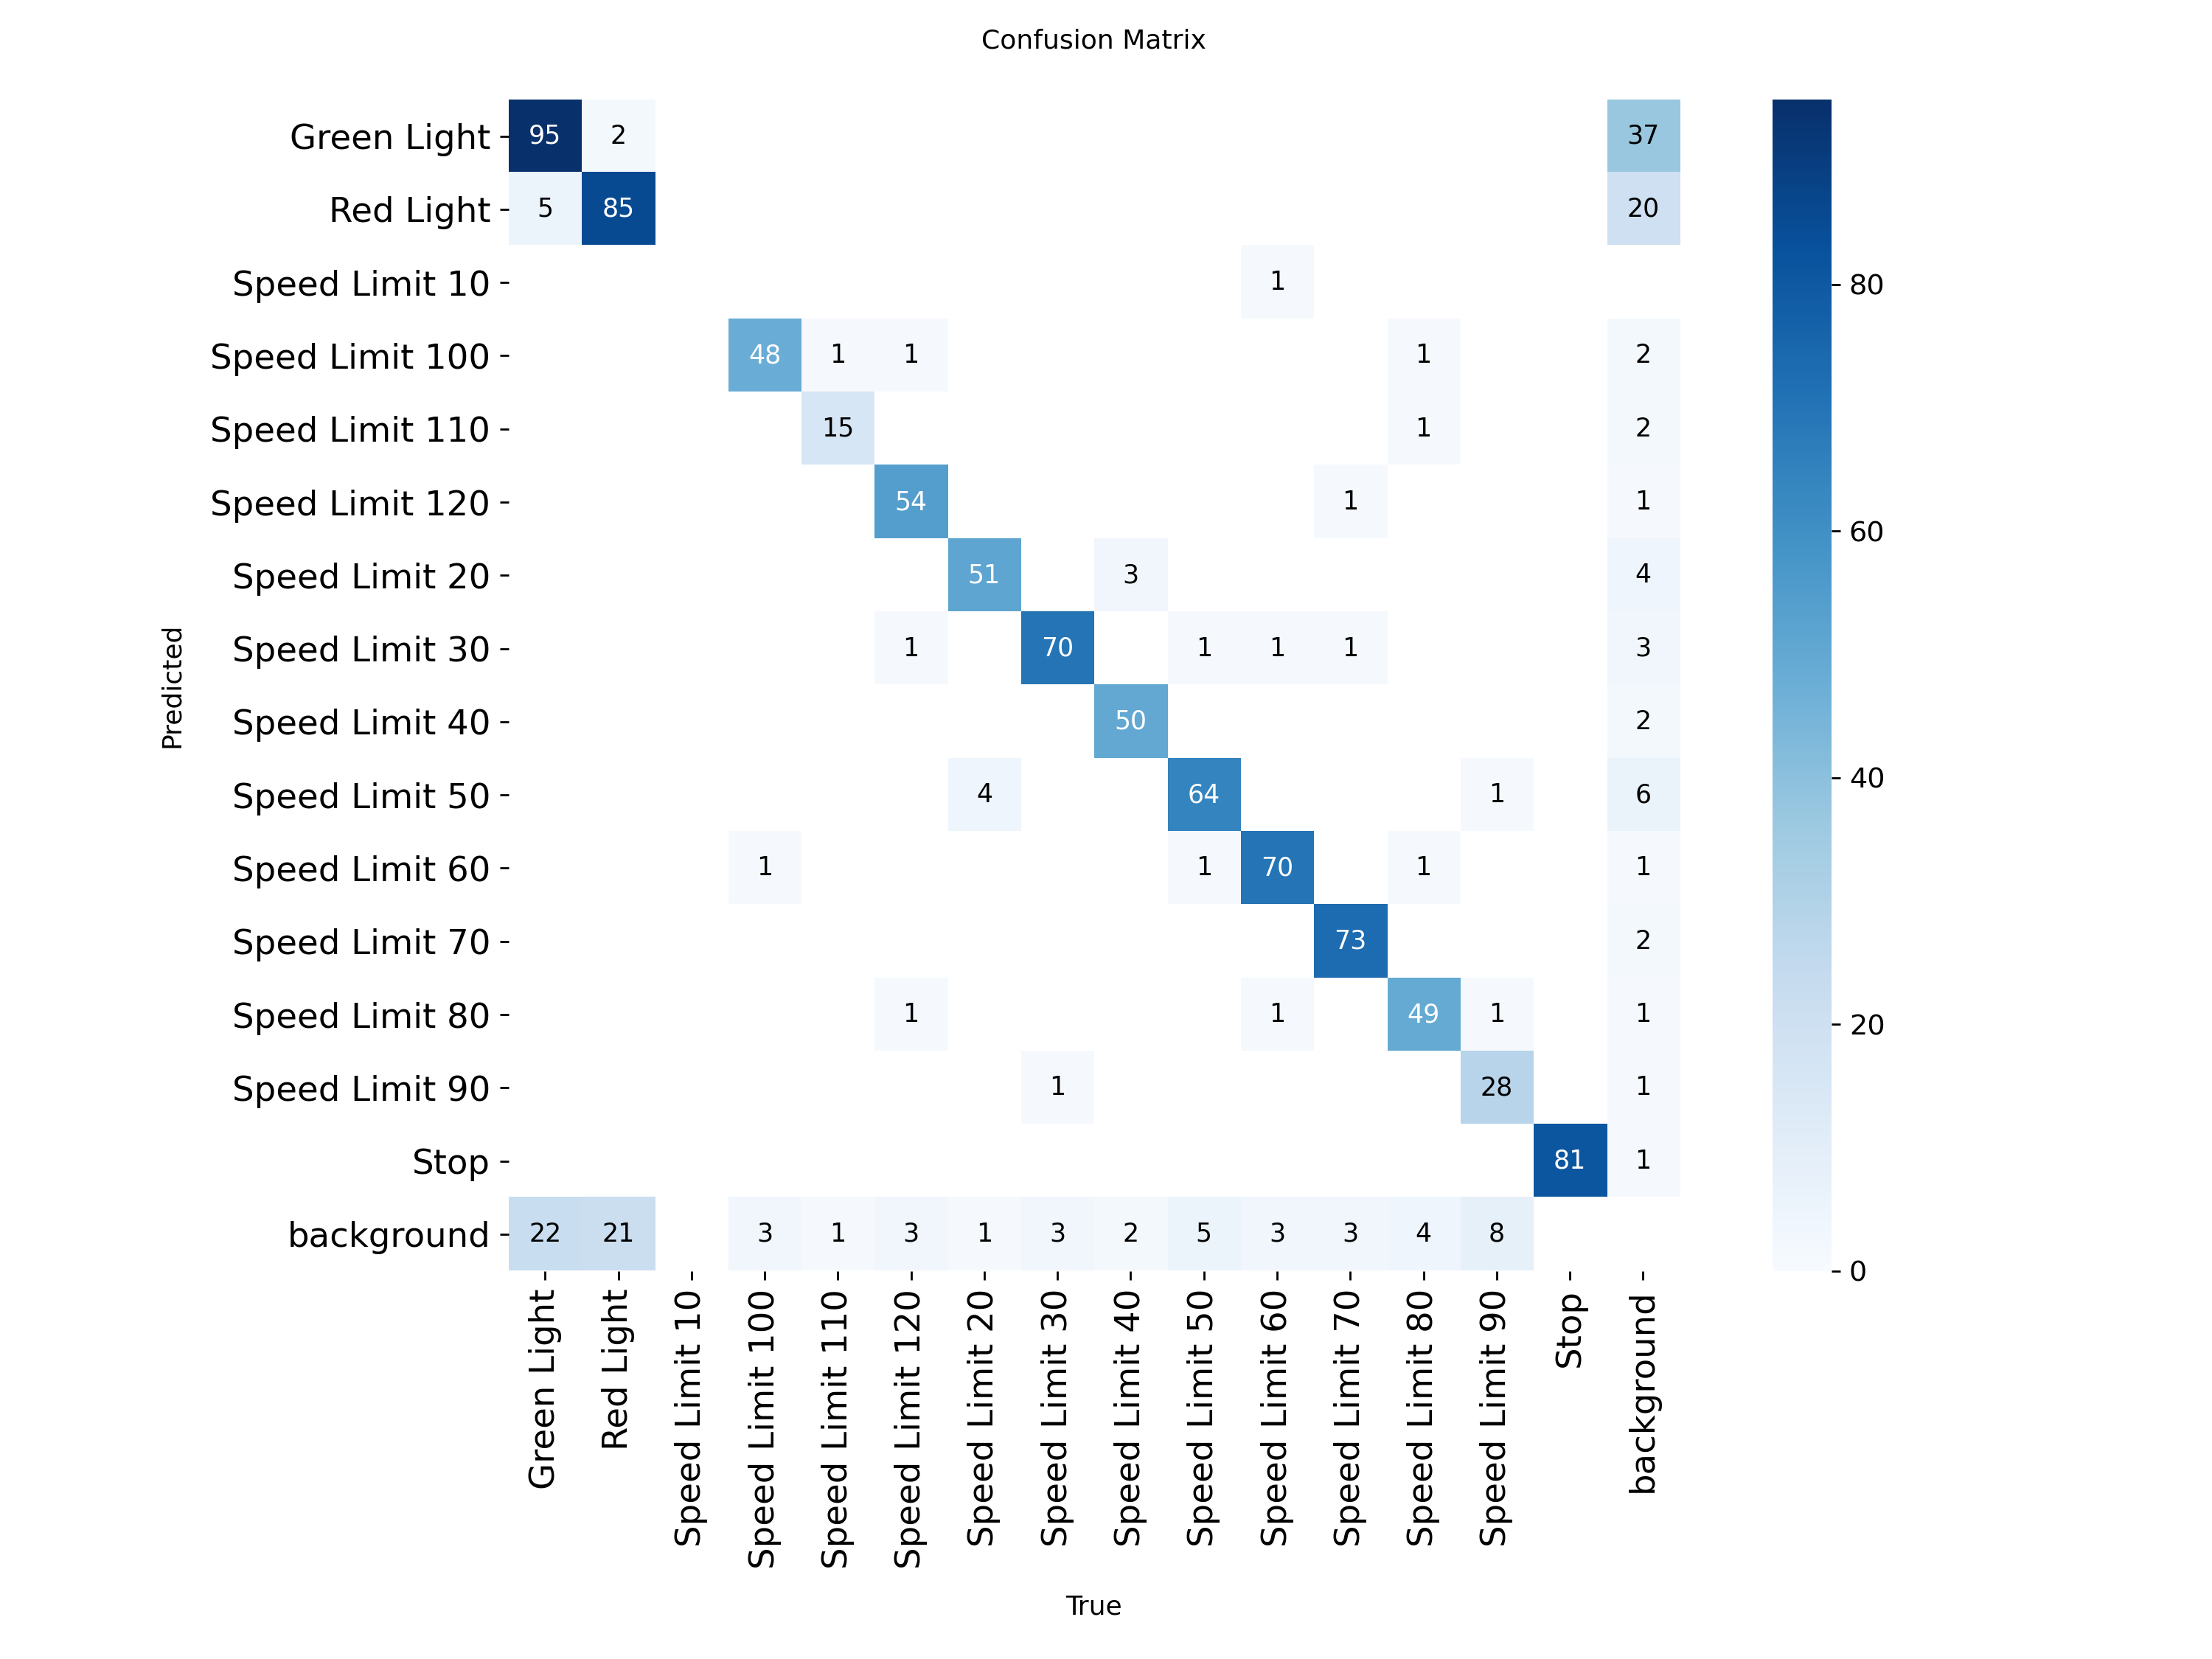

In [17]:
resultdata = '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train'
from IPython.display import Image
Image(filename=f'{resultdata}/confusion_matrix.png')

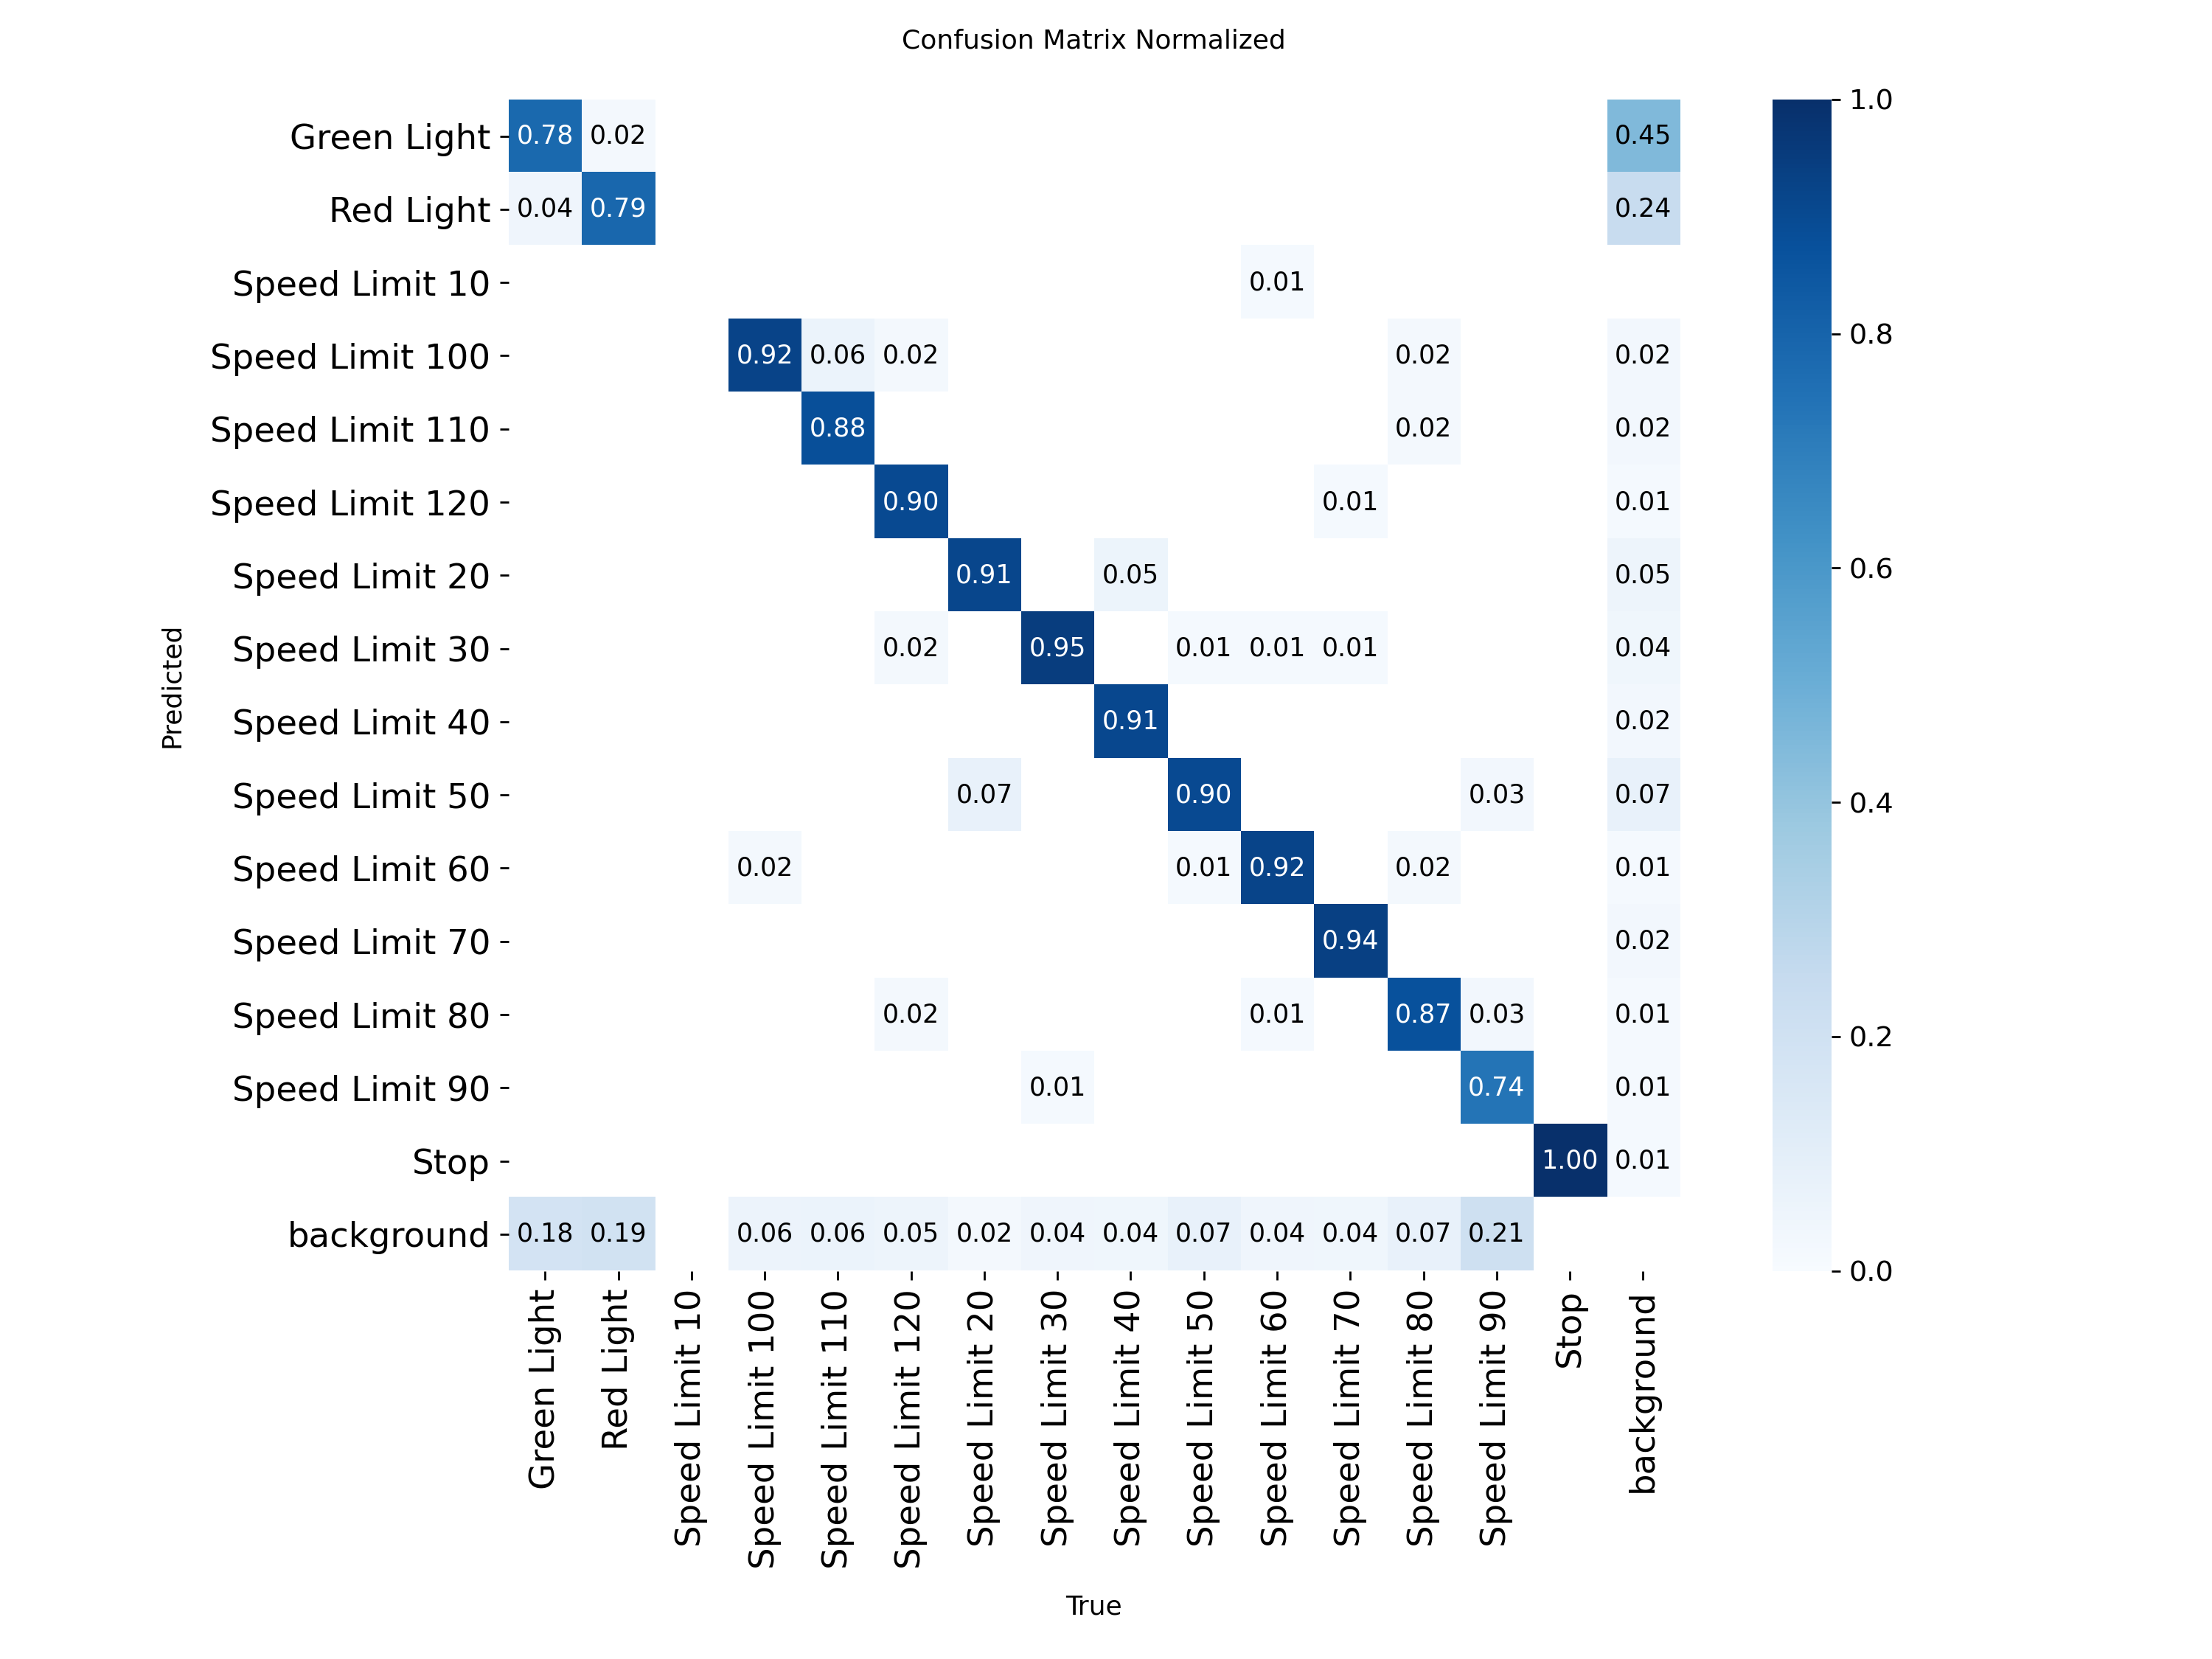

In [18]:
Image(filename=f'{resultdata}/confusion_matrix_normalized.png')

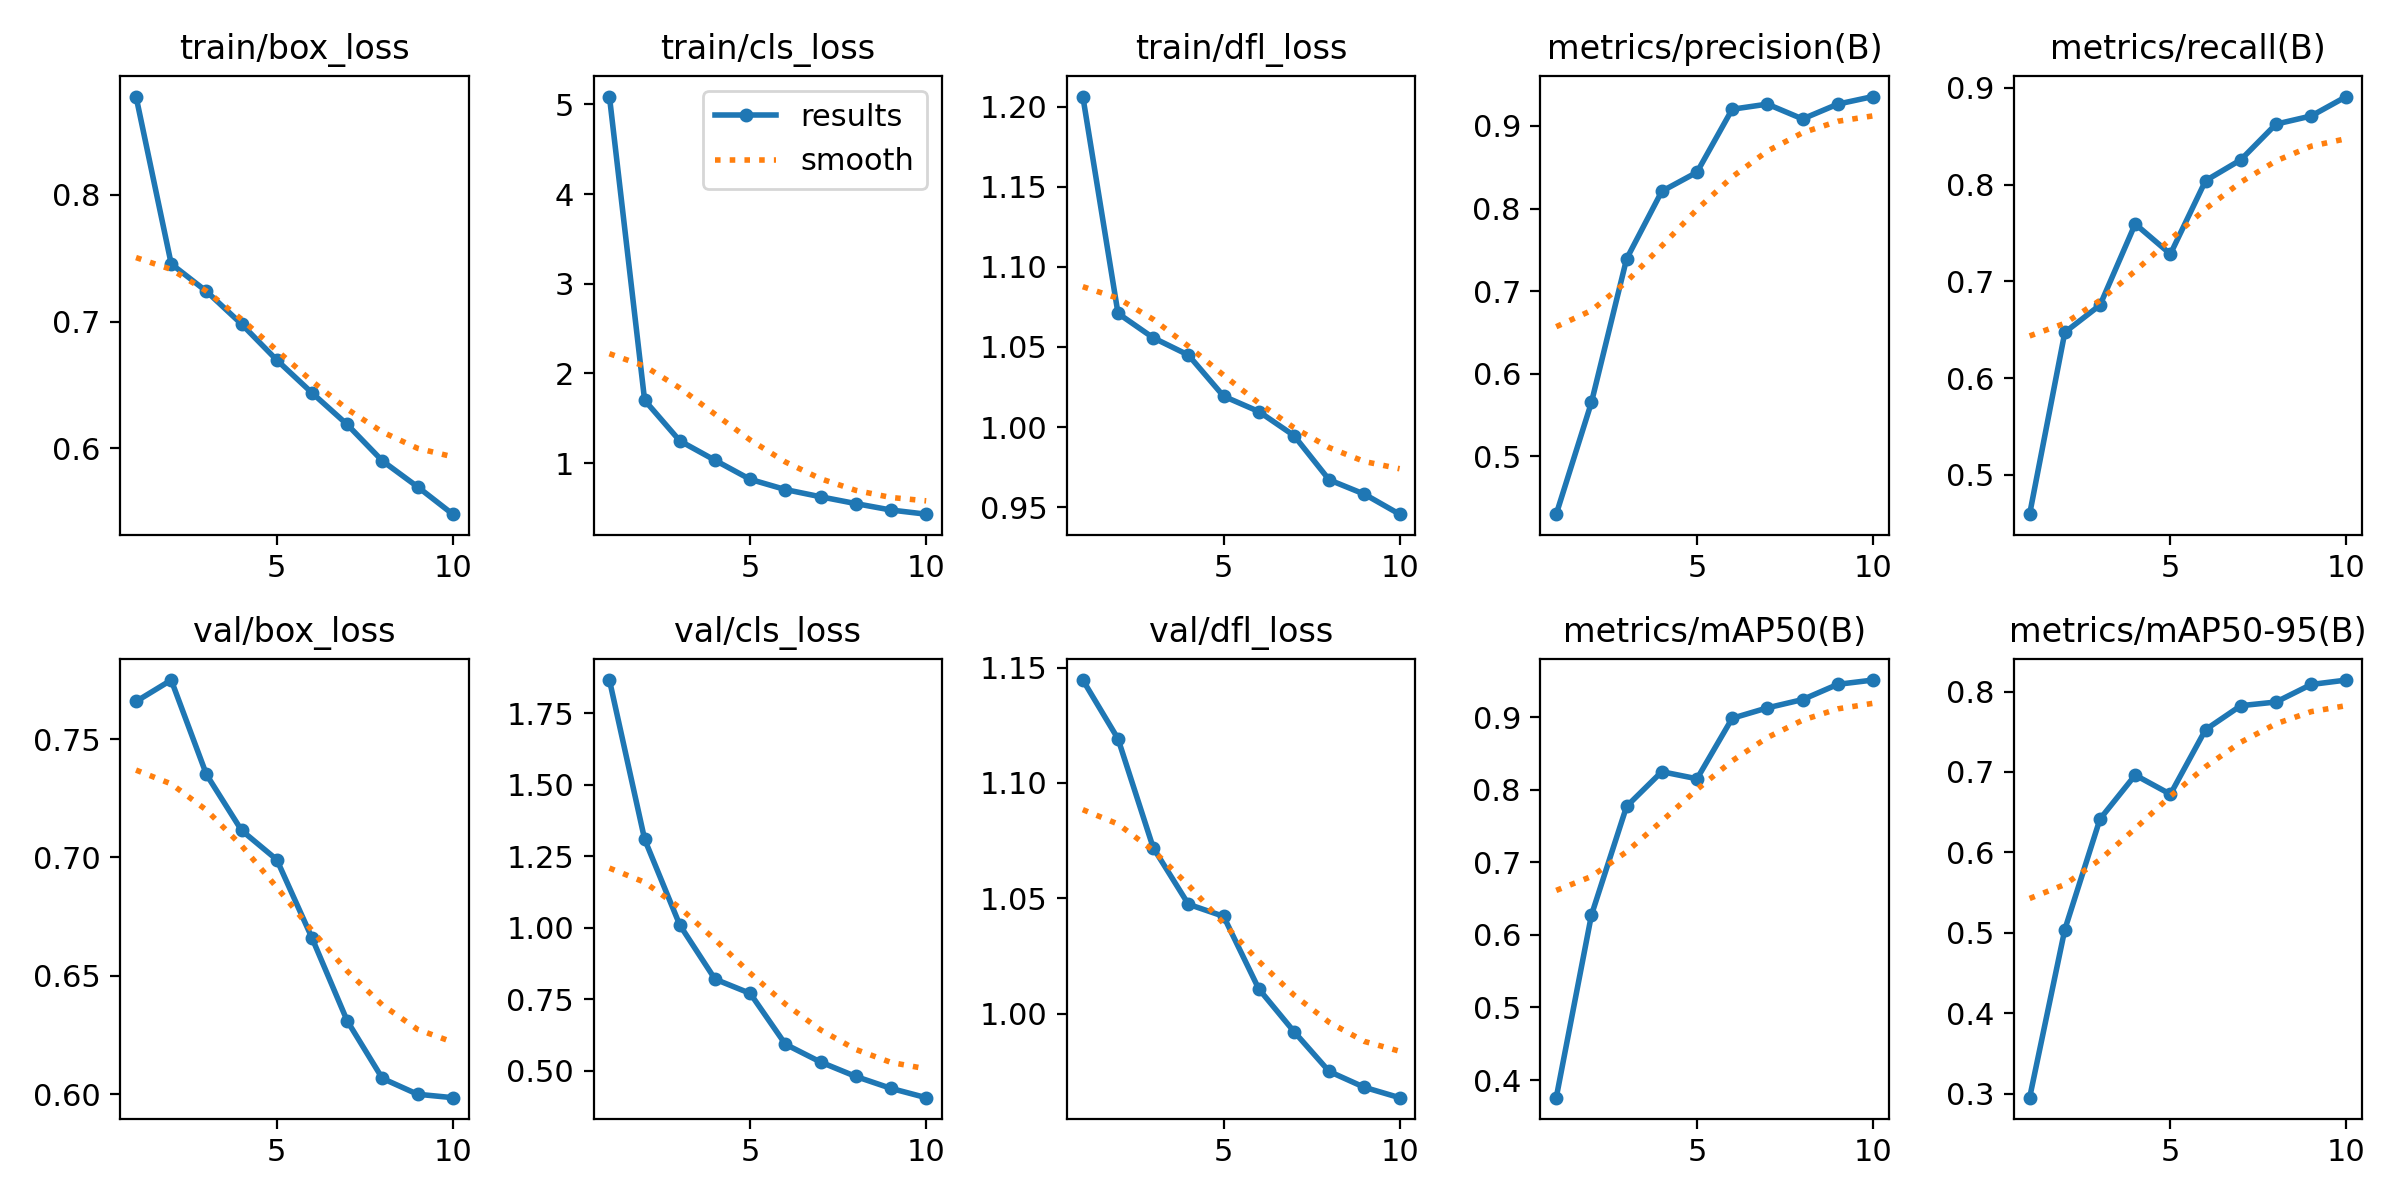

In [19]:
Image(filename=f'{resultdata}/results.png')

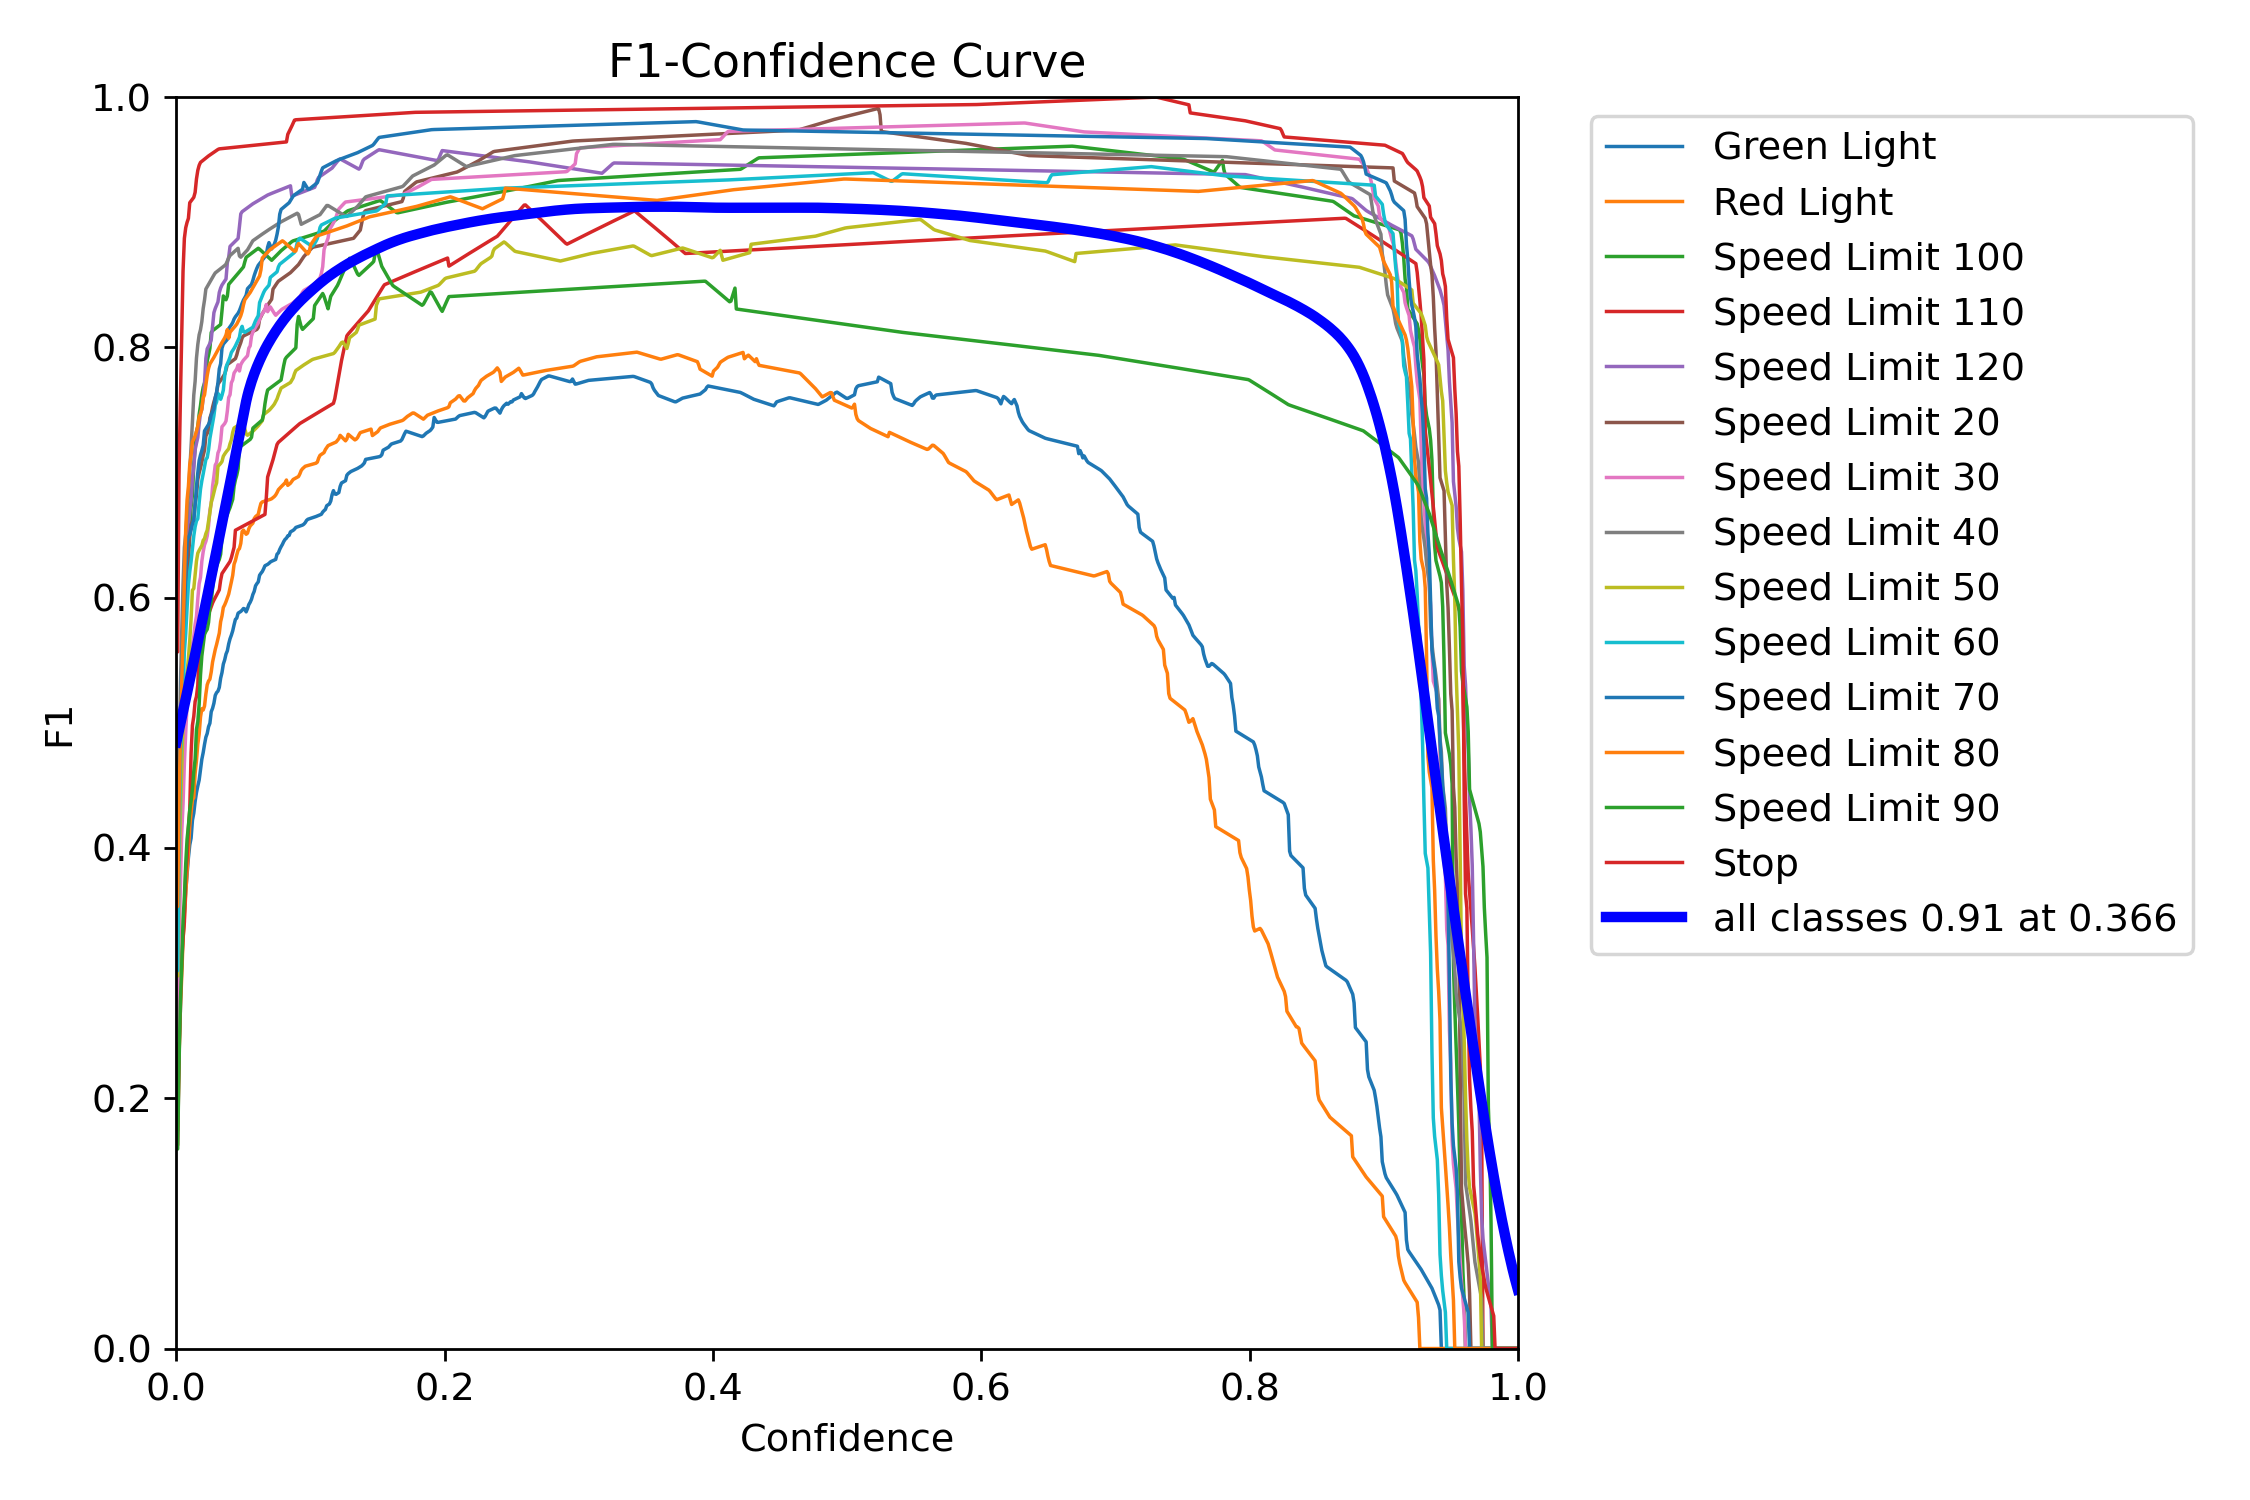

In [20]:
from IPython.display import Image

resultdata = '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train'
Image(filename=f'{resultdata}/BoxF1_curve.png')

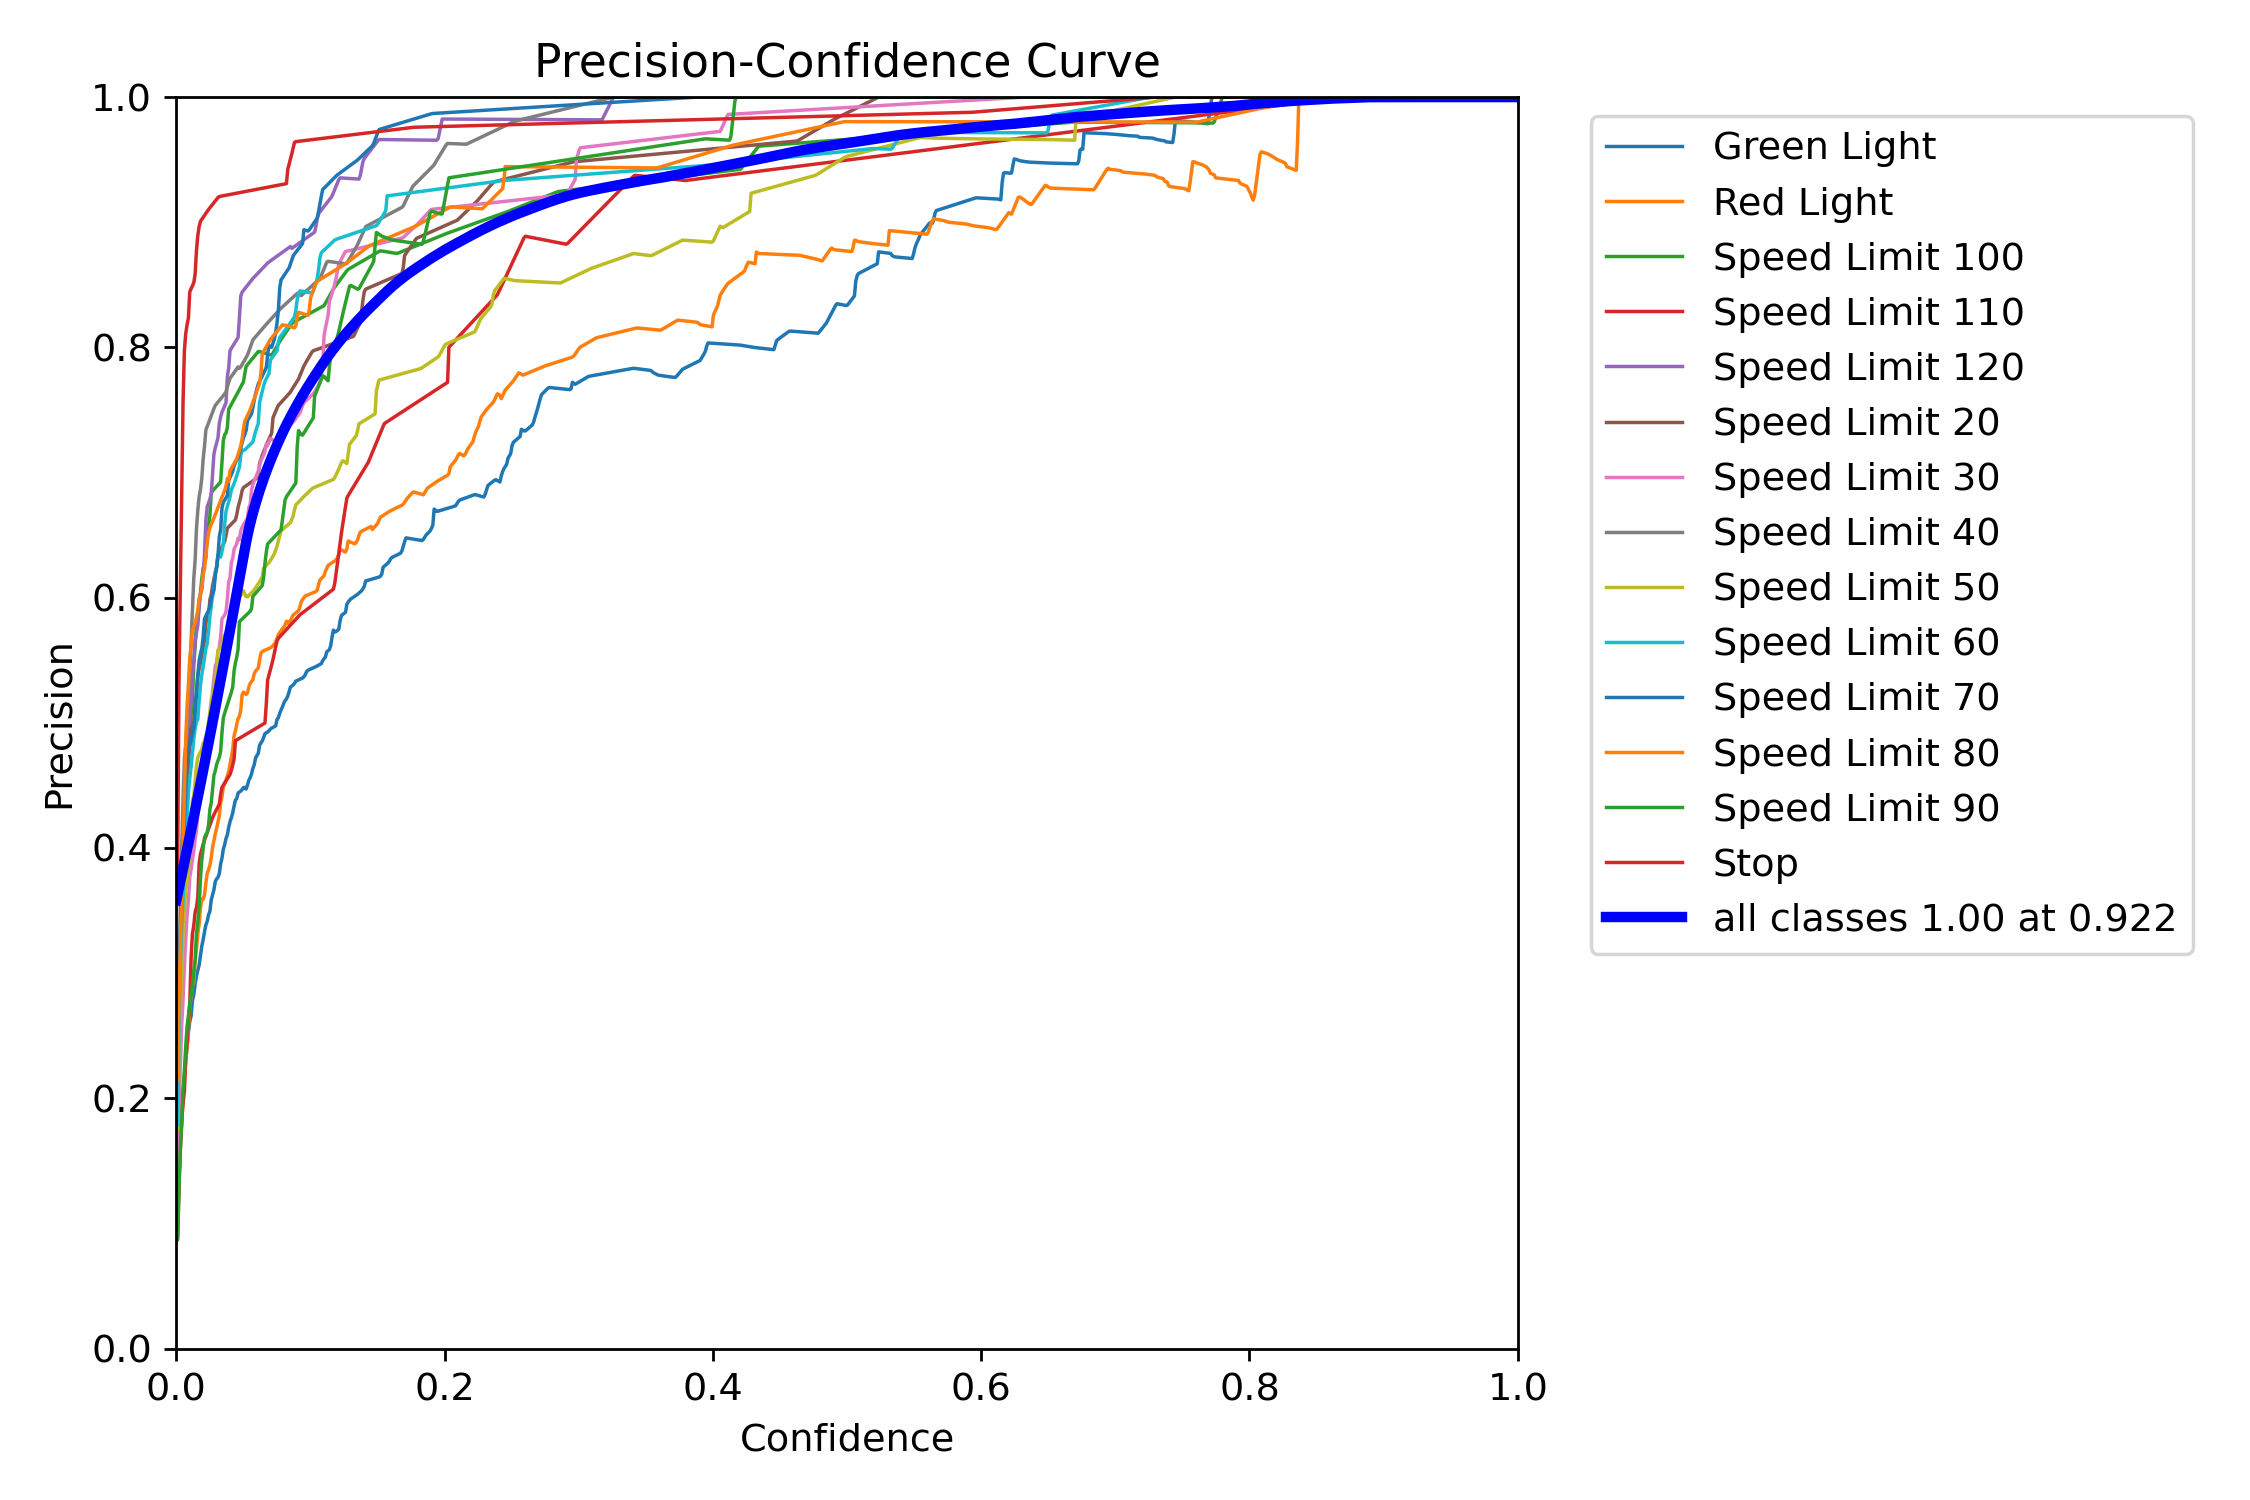

In [21]:
Image(filename=f'{resultdata}/BoxP_curve.png')

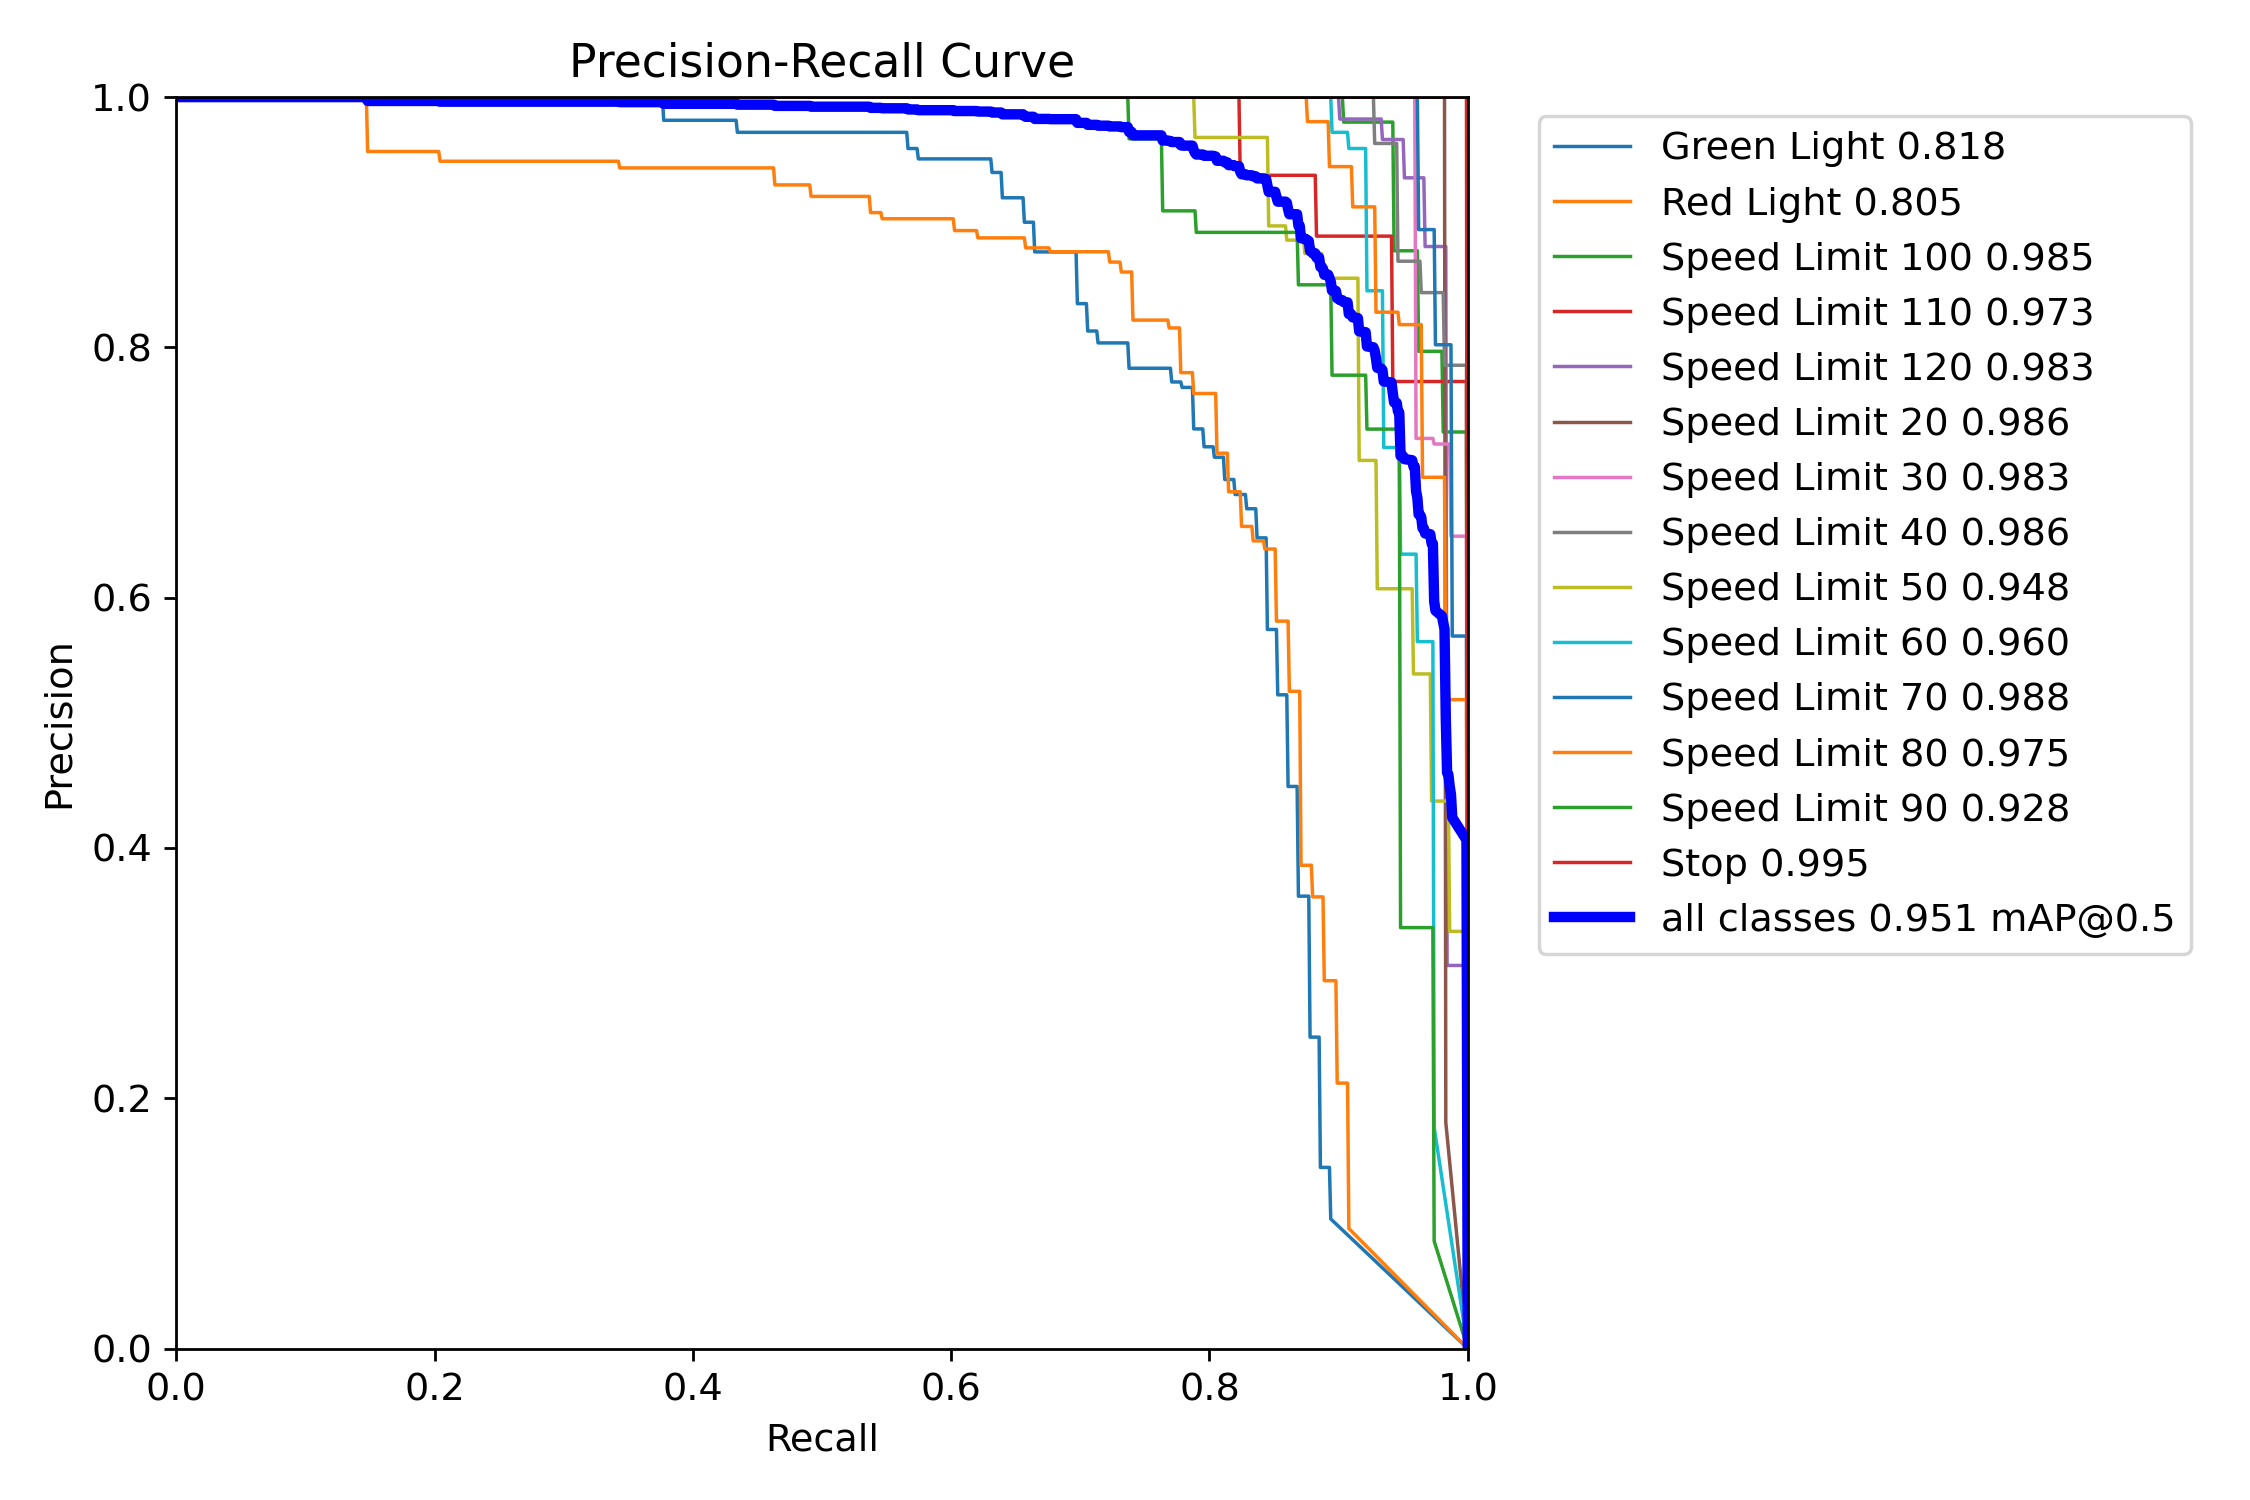

In [22]:
Image(filename=f'{resultdata}/BoxPR_curve.png')

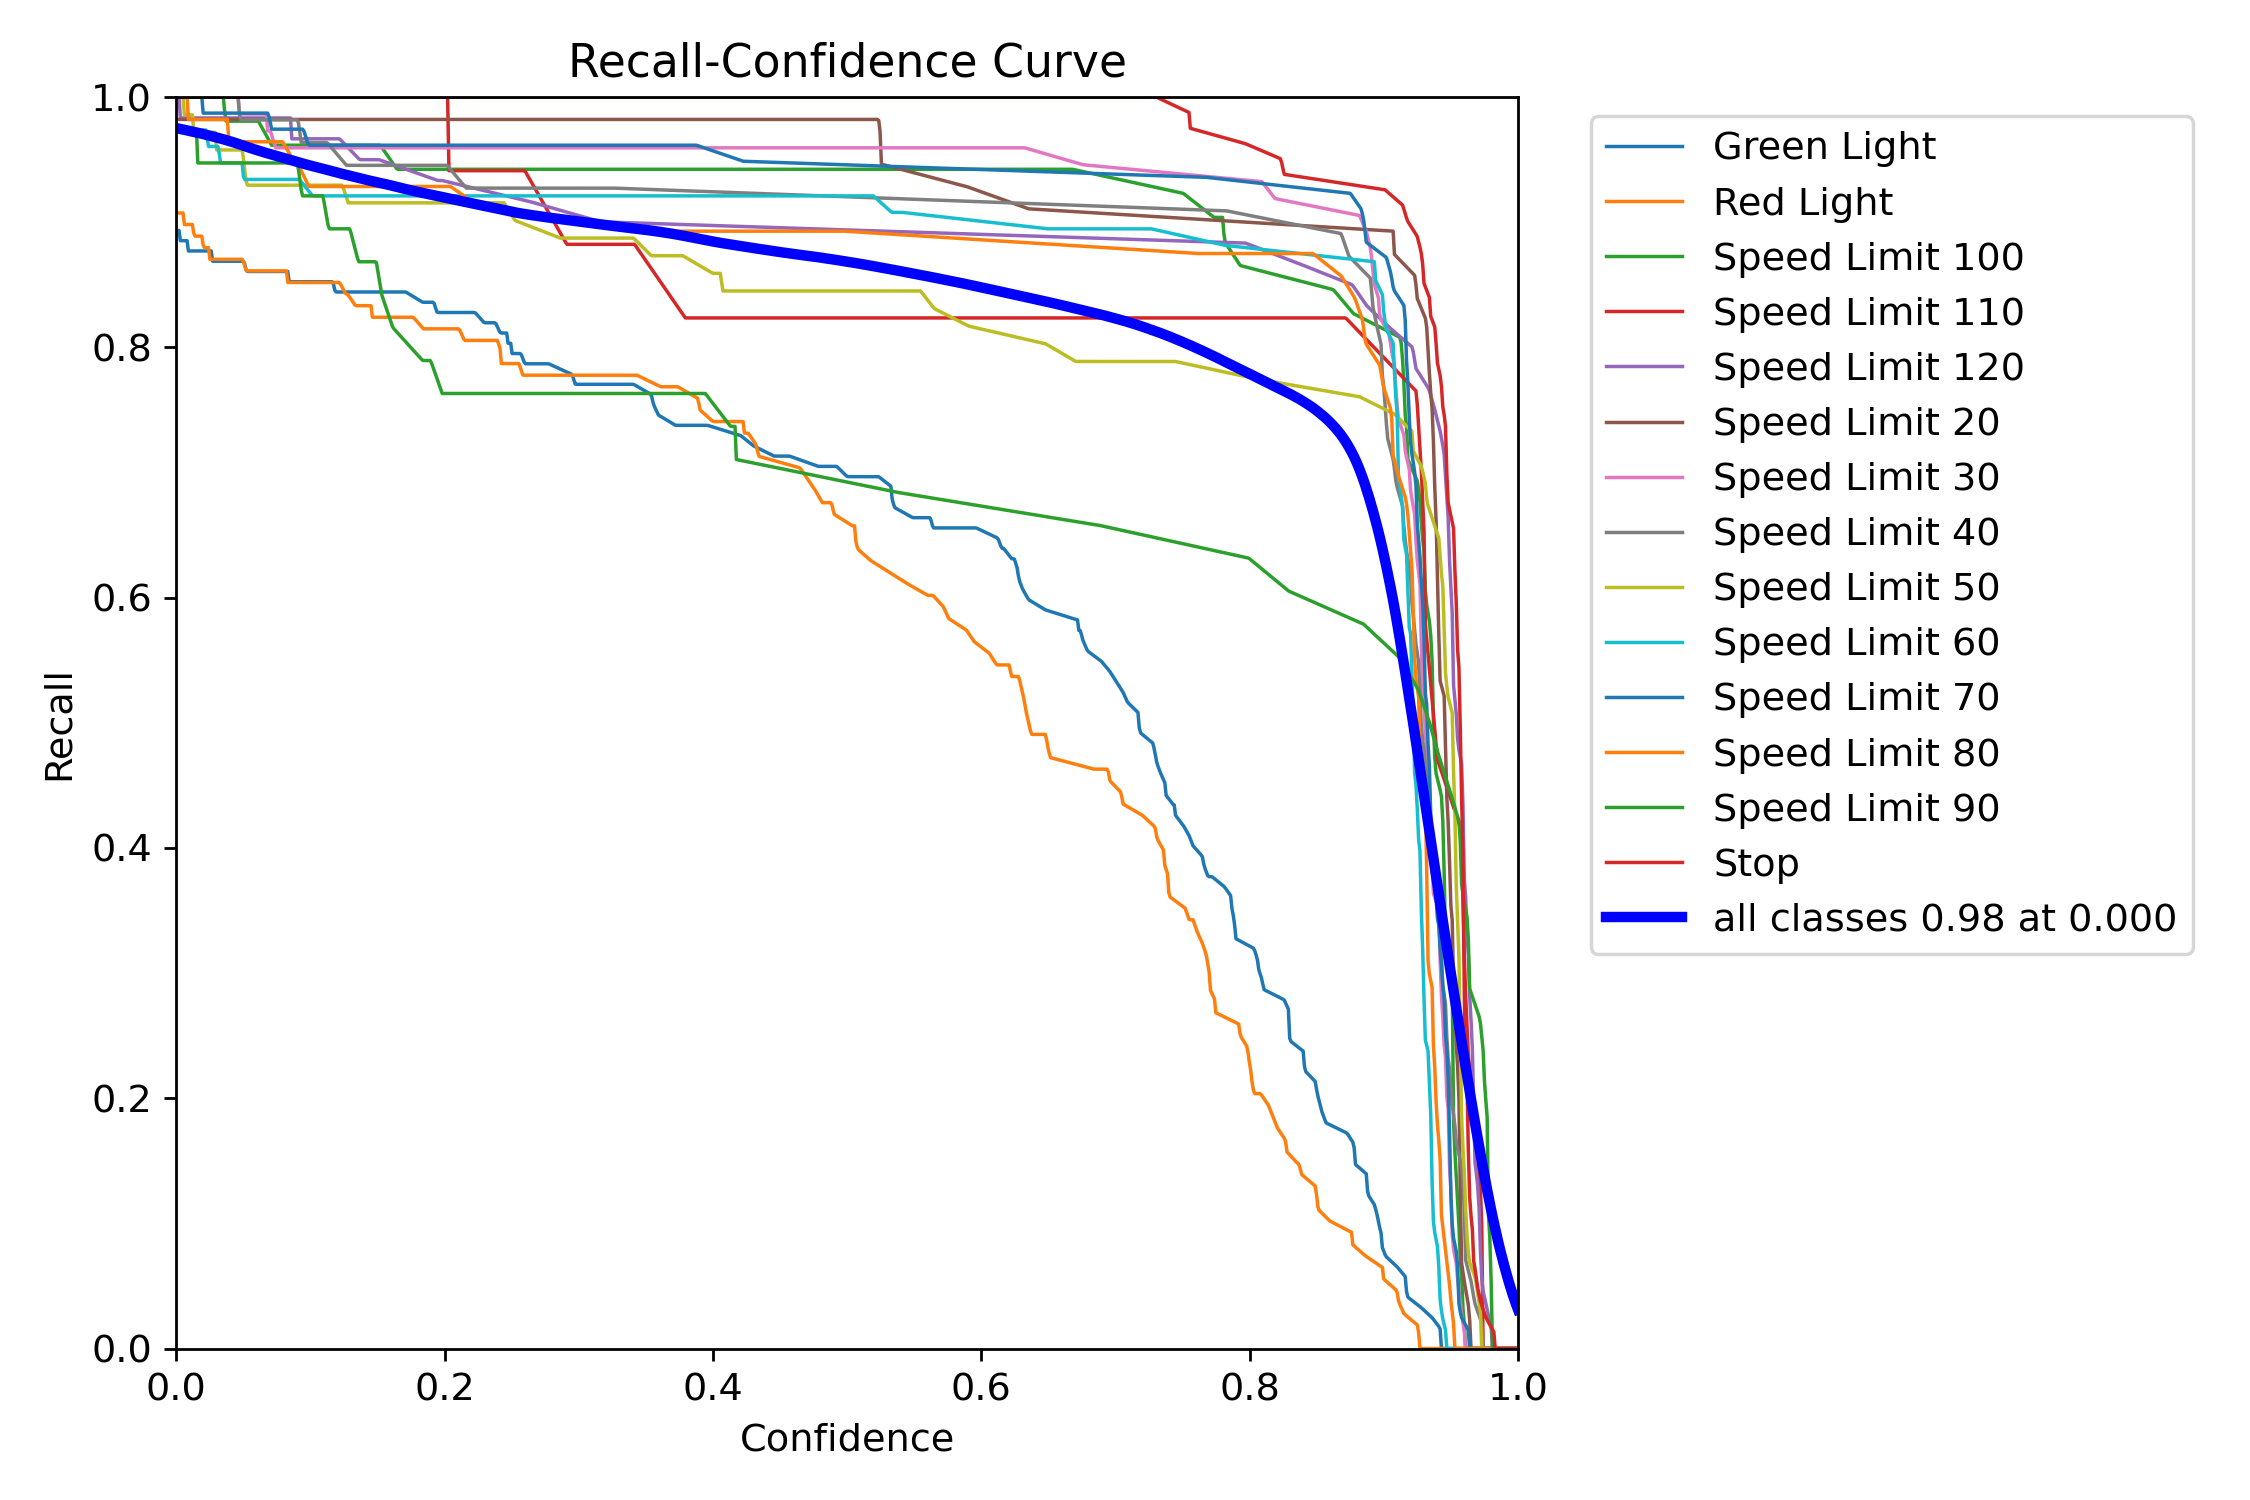

In [23]:
Image(filename=f'{resultdata}/BoxR_curve.png')

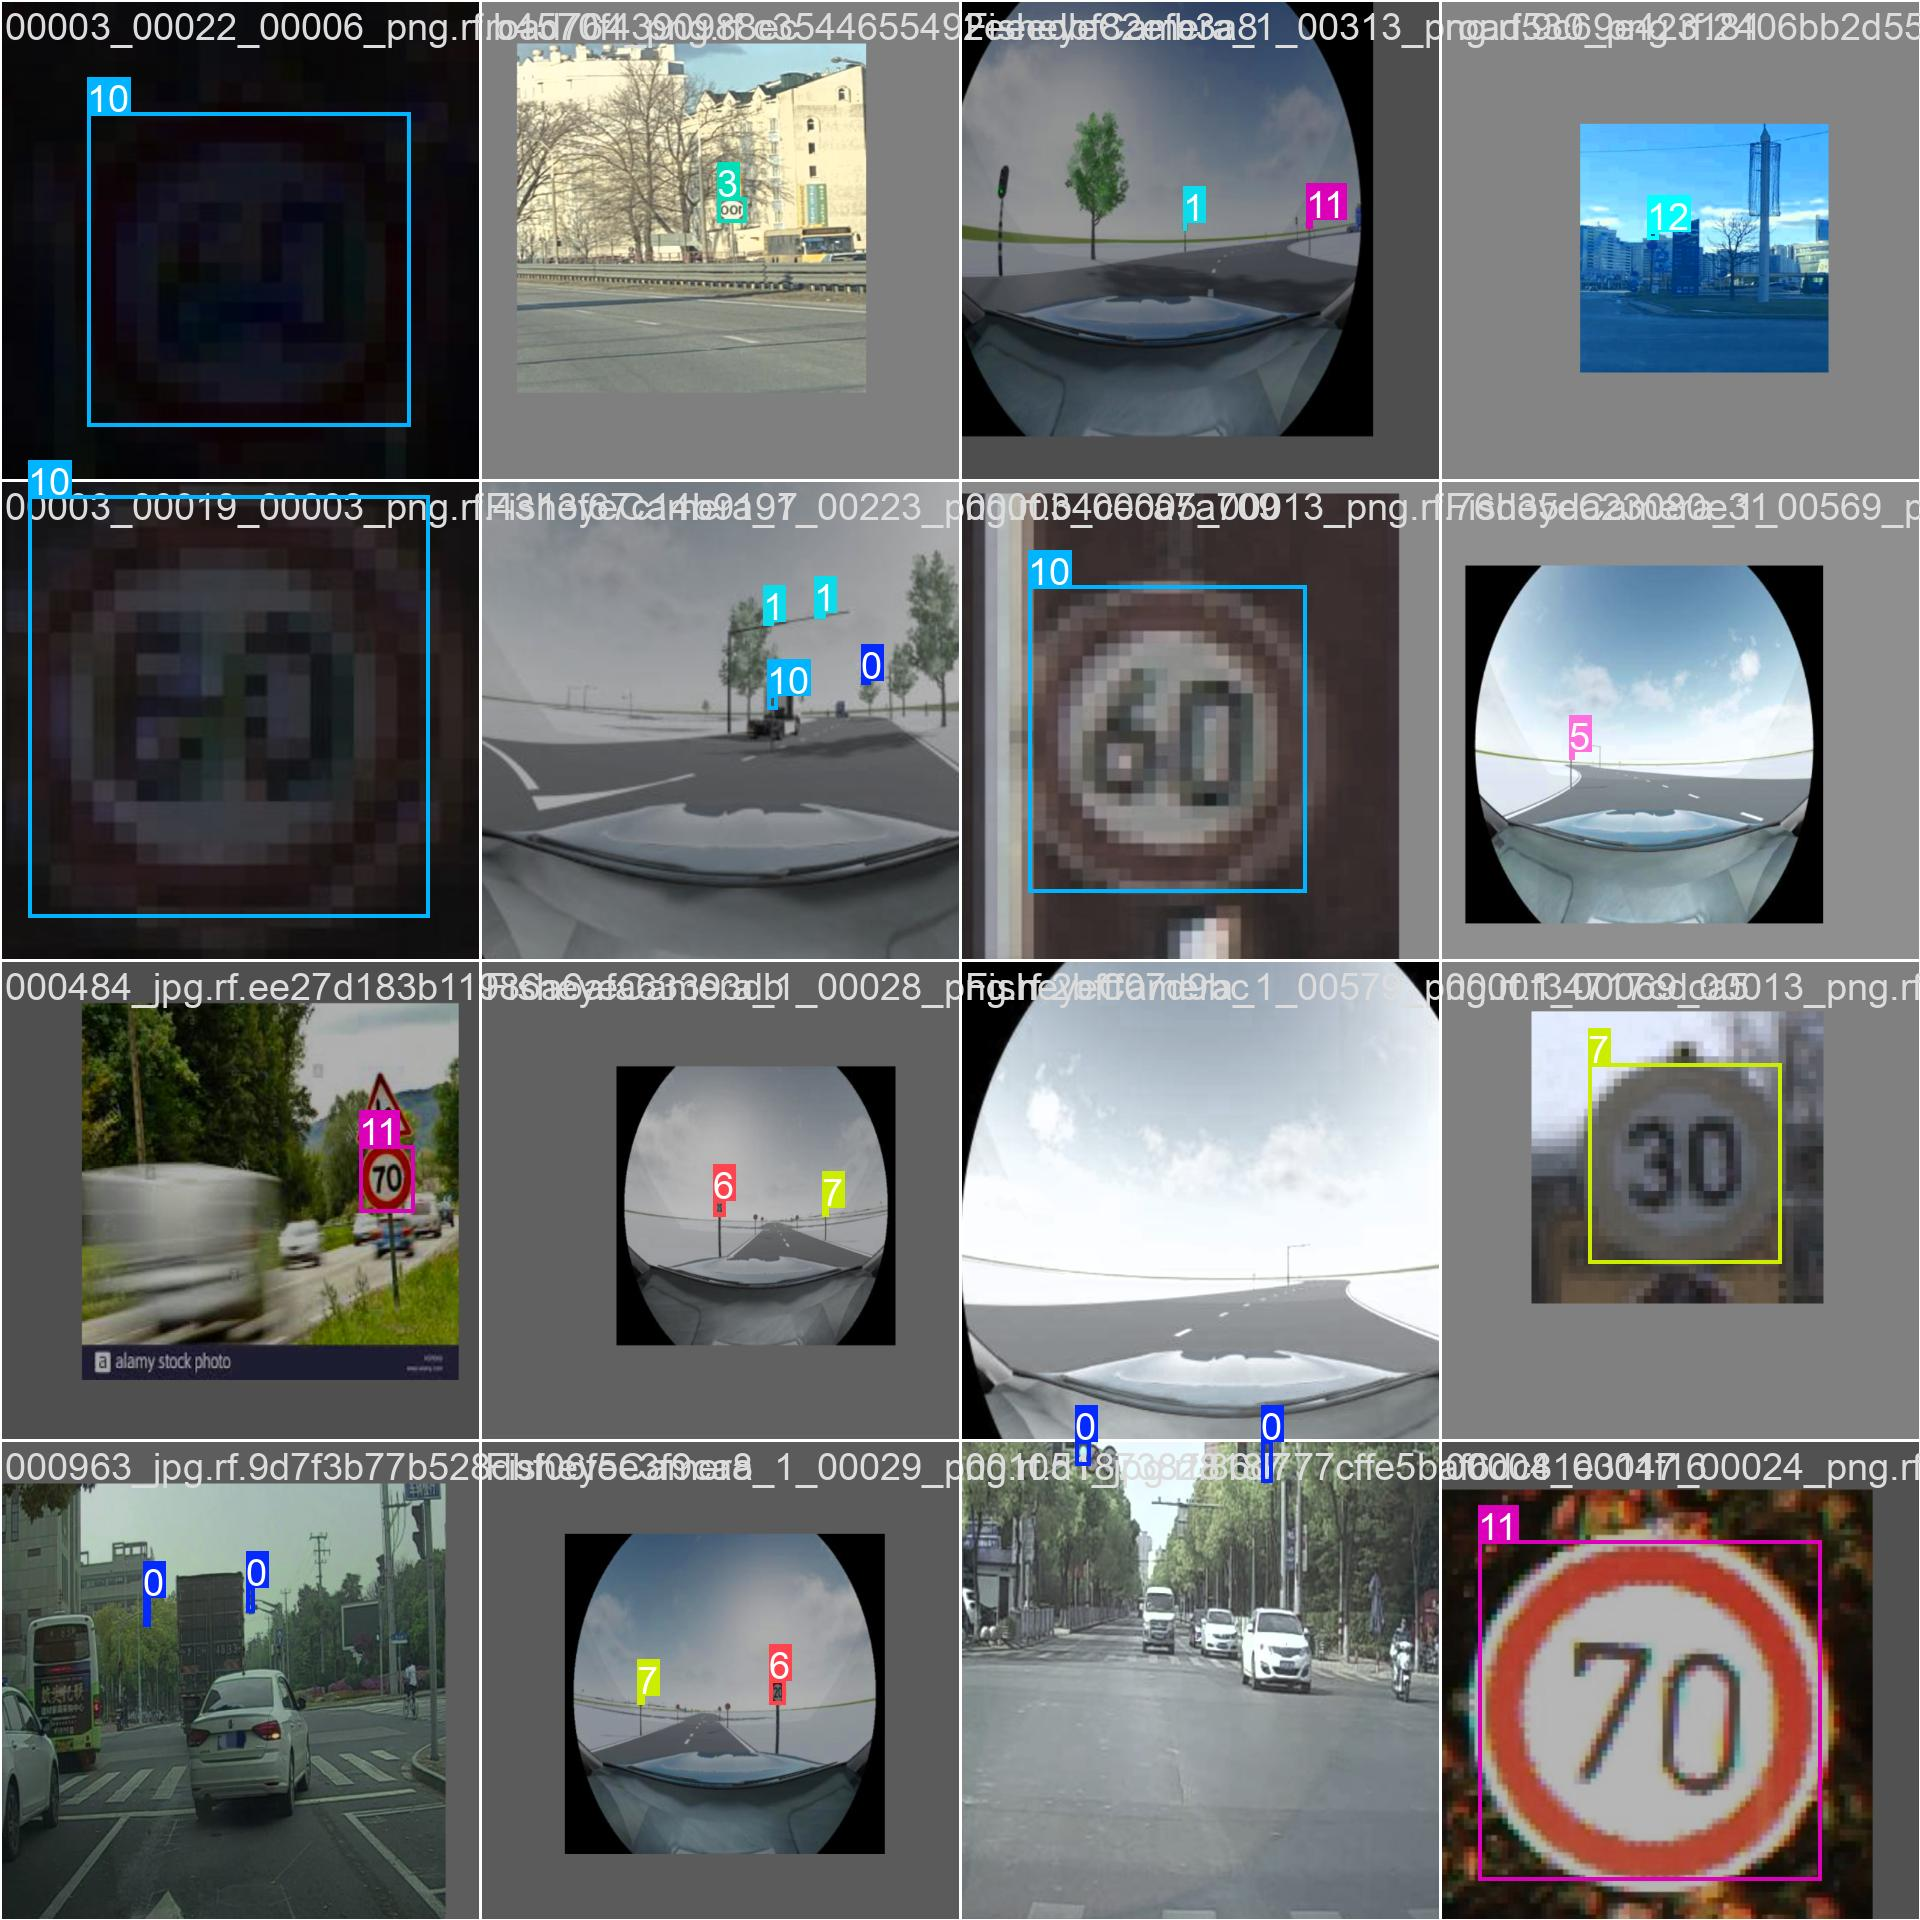

In [24]:
from IPython.display import Image

resultdata = '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train'
Image(filename=f'{resultdata}/train_batch2.jpg')


In [25]:
import pandas as pd

pd.read_csv('/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/results.csv')

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,77.1341,0.87722,5.08795,1.20628,0.43013,0.45942,0.37572,0.29502,0.76591,1.86644,1.14458,0.000175,0.000175,0.000175
1,2,148.5920,0.74540,1.70189,1.07093,0.56530,0.64735,0.62709,0.50412,0.77496,1.30973,1.11910,0.000315,0.000315,0.000315
2,3,219.6980,0.72382,1.24875,1.05569,0.73917,0.67549,0.77695,0.64157,0.73507,1.00987,1.07192,0.000421,0.000421,0.000421
3,4,290.2120,0.69797,1.03247,1.04492,0.82091,0.75935,0.82469,0.69616,0.71143,0.82073,1.04741,0.000370,0.000370,0.000370
4,5,361.3350,0.66966,0.81964,1.01923,0.84397,0.72824,0.81494,0.67237,0.69907,0.77087,1.04218,0.000318,0.000318,0.000318
5,6,431.4530,0.64381,0.70569,1.00968,0.92021,0.80409,0.89825,0.75270,0.66599,0.59318,1.01071,0.000266,0.000266,0.000266
6,7,502.1220,0.61891,0.62534,0.99465,0.92641,0.82562,0.91262,0.78246,0.63098,0.53086,0.99224,0.000214,0.000214,0.000214
7,8,572.3170,0.59024,0.54941,0.96702,0.90845,0.86251,0.92400,0.78700,0.60665,0.48047,0.97495,0.000161,0.000161,0.000161
8,9,643.0260,0.56984,0.47756,0.95809,0.92641,0.87094,0.94500,0.80881,0.59996,0.43883,0.96808,0.000109,0.000109,0.000109
9,10,713.4260,0.54827,0.43139,0.94560,0.93557,0.89102,0.95091,0.81433,0.59851,0.40631,0.96359,0.000057,0.000057,0.000057


In [26]:
%pwd

'/content/RoadSignDetection/Self-Driving-Cars-6'

In [27]:
os.chdir("/content")

In [28]:
%pwd

'/content'

In [29]:
!mkdir ManualTestingdata

In [30]:
os.chdir("/content/ManualTestingdata")

TEST 1 , Fast Moving vehicle

In [31]:
URL = "https://drive.google.com/file/d/1WSa0d5aJGKM1POW6QTTxjFZOPhWK7m-a/view?usp=sharing"
ID= '1WSa0d5aJGKM1POW6QTTxjFZOPhWK7m-a'

# Use gdown for more reliable Google Drive downloads
!pip install gdown -q
!gdown --id "$ID" -O inputvideo.mp4

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WSa0d5aJGKM1POW6QTTxjFZOPhWK7m-a
To: /content/ManualTestingdata/inputvideo.mp4
100% 27.2M/27.2M [00:00<00:00, 29.2MB/s]


In [34]:
!yolo task=detect mode=predict model=/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.pt conf=0.25 source='inputvideo.mp4' save=True

Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/608) /content/ManualTestingdata/inputvideo.mp4: 384x640 (no detections), 68.5ms
video 1/1 (frame 2/608) /content/ManualTestingdata/inputvideo.mp4: 384x640 (no detections), 10.8ms
video 1/1 (frame 3/608) /content/ManualTestingdata/inputvideo.mp4: 384x640 (no detections), 10.8ms
video 1/1 (frame 4/608) /content/ManualTestingdata/inputvideo.mp4: 384x640 (no detections), 10.8ms
video 1/1 (frame 5/608) /content/ManualTestingdata/inputvideo.mp4: 384x640 (no detections), 13.2ms
video 1/1 (frame 6/608) /content/ManualTestingdata/inputvideo.mp4: 384x640 (no detections), 23.9ms
video 1/1 (frame 7/608) /content/ManualTestingdata/inputvideo.mp4: 384x640 (no detections), 10.8ms
video 1/1 (frame 8/608) /content/ManualTestingdata/inputvideo.mp4: 384x640 (no detections), 10.8ms
video 1/1 (frame 9/608) /content/ManualTes

In [35]:
import os

# Get the path to the generated AVI video
avi_video_path = '/content/ManualTestingdata/runs/detect/predict/inputvideo.avi'

# Define the output MP4 video path
mp4_video_path = '/content/ManualTestingdata/runs/detect/predict/inputvideo.mp4'

# Use ffmpeg to convert AVI to MP4
!ffmpeg -i "{avi_video_path}" -codec copy "{mp4_video_path}"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [36]:
from google.colab import files

files.download(mp4_video_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TEST 2 , Stable video

In [37]:
URL1= "https://drive.google.com/file/d/10NTbk9gND2Fk1wHI1JeZQj7nOb6WZOnG/view?usp=sharing"
ID1= '10NTbk9gND2Fk1wHI1JeZQj7nOb6WZOnG'

# Use gdown for more reliable Google Drive downloads
!pip install gdown -q
!gdown --id "$ID1" -O testvideo.mp4

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10NTbk9gND2Fk1wHI1JeZQj7nOb6WZOnG
To: /content/ManualTestingdata/testvideo.mp4
100% 921k/921k [00:00<00:00, 9.05MB/s]


In [39]:
!yolo task=detect mode=predict model=/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.pt conf=0.25 source='testvideo.mp4' save=True

Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/270) /content/ManualTestingdata/testvideo.mp4: 384x640 1 Speed Limit 30, 45.1ms
video 1/1 (frame 2/270) /content/ManualTestingdata/testvideo.mp4: 384x640 1 Speed Limit 30, 10.7ms
video 1/1 (frame 3/270) /content/ManualTestingdata/testvideo.mp4: 384x640 1 Speed Limit 30, 10.7ms
video 1/1 (frame 4/270) /content/ManualTestingdata/testvideo.mp4: 384x640 1 Speed Limit 30, 10.7ms
video 1/1 (frame 5/270) /content/ManualTestingdata/testvideo.mp4: 384x640 1 Speed Limit 30, 10.7ms
video 1/1 (frame 6/270) /content/ManualTestingdata/testvideo.mp4: 384x640 1 Speed Limit 30, 10.7ms
video 1/1 (frame 7/270) /content/ManualTestingdata/testvideo.mp4: 384x640 1 Speed Limit 30, 10.7ms
video 1/1 (frame 8/270) /content/ManualTestingdata/testvideo.mp4: 384x640 1 Speed Limit 30, 10.7ms
video 1/1 (frame 9/270) /content/ManualTes

In [40]:
import os
avi_video_path1 = '/content/ManualTestingdata/runs/detect/predict2/testvideo.avi'
mp4_video_path1 = '/content/ManualTestingdata/runs/detect/predict2/testvideo.mp4'

!ffmpeg -i "{avi_video_path1}" -codec copy "{mp4_video_path1}"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [41]:
from google.colab import files

files.download(mp4_video_path1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TEST 3 , Traffic lights

In [42]:
URL2= "https://drive.google.com/file/d/1s9DYznU4wRXD83MxGemQTNYf2AP4M13U/view?usp=sharing"
ID2= '1s9DYznU4wRXD83MxGemQTNYf2AP4M13U'

# Use gdown for more reliable Google Drive downloads
!pip install gdown -q
!gdown --id "$ID2" -O tlvideo.mp4

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1s9DYznU4wRXD83MxGemQTNYf2AP4M13U
To: /content/ManualTestingdata/tlvideo.mp4
100% 476k/476k [00:00<00:00, 6.53MB/s]


In [43]:
!yolo task=detect mode=predict model=/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.pt conf=0.25 source='tlvideo.mp4' save=True

Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/524) /content/ManualTestingdata/tlvideo.mp4: 384x640 1 Red Light, 43.5ms
video 1/1 (frame 2/524) /content/ManualTestingdata/tlvideo.mp4: 384x640 1 Red Light, 10.7ms
video 1/1 (frame 3/524) /content/ManualTestingdata/tlvideo.mp4: 384x640 1 Red Light, 10.6ms
video 1/1 (frame 4/524) /content/ManualTestingdata/tlvideo.mp4: 384x640 1 Red Light, 10.7ms
video 1/1 (frame 5/524) /content/ManualTestingdata/tlvideo.mp4: 384x640 1 Red Light, 10.6ms
video 1/1 (frame 6/524) /content/ManualTestingdata/tlvideo.mp4: 384x640 1 Red Light, 10.6ms
video 1/1 (frame 7/524) /content/ManualTestingdata/tlvideo.mp4: 384x640 1 Red Light, 10.6ms
video 1/1 (frame 8/524) /content/ManualTestingdata/tlvideo.mp4: 384x640 1 Red Light, 10.6ms
video 1/1 (frame 9/524) /content/ManualTestingdata/tlvideo.mp4: 384x640 1 Red Light, 10.6ms
video 

In [44]:
import os
avi_video_path2 = '/content/ManualTestingdata/runs/detect/predict3/tlvideo.avi'
mp4_video_path2 = '/content/ManualTestingdata/runs/detect/predict3/tlvideo.mp4'

!ffmpeg -i "{avi_video_path2}" -codec copy "{mp4_video_path2}"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [45]:
from google.colab import files

files.download(mp4_video_path2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TEST 3 , Traffic light plus speed limit sign

In [46]:
URL3= "https://drive.google.com/file/d/1EK5BeagAdOWC7MJg-g0dUu_mqSThnmIB/view?usp=sharing"
ID3= '1EK5BeagAdOWC7MJg-g0dUu_mqSThnmIB'

# Use gdown for more reliable Google Drive downloads
!pip install gdown -q
!gdown --id "$ID3" -O tlspvideo.mp4

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EK5BeagAdOWC7MJg-g0dUu_mqSThnmIB
To: /content/ManualTestingdata/tlspvideo.mp4
100% 3.63M/3.63M [00:00<00:00, 25.3MB/s]


In [47]:
!yolo task=detect mode=predict model=/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.pt conf=0.25 source='tlspvideo.mp4' save=True

Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/360) /content/ManualTestingdata/tlspvideo.mp4: 384x640 1 Speed Limit 40, 43.8ms
video 1/1 (frame 2/360) /content/ManualTestingdata/tlspvideo.mp4: 384x640 1 Speed Limit 40, 10.7ms
video 1/1 (frame 3/360) /content/ManualTestingdata/tlspvideo.mp4: 384x640 1 Speed Limit 40, 10.7ms
video 1/1 (frame 4/360) /content/ManualTestingdata/tlspvideo.mp4: 384x640 1 Speed Limit 40, 10.7ms
video 1/1 (frame 5/360) /content/ManualTestingdata/tlspvideo.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 6/360) /content/ManualTestingdata/tlspvideo.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 7/360) /content/ManualTestingdata/tlspvideo.mp4: 384x640 (no detections), 12.3ms
video 1/1 (frame 8/360) /content/ManualTestingdata/tlspvideo.mp4: 384x640 1 Speed Limit 40, 10.7ms
video 1/1 (frame 9/360) /content/ManualTestin

In [49]:
import os
avi_video_path3 = '/content/ManualTestingdata/runs/detect/predict4/tlspvideo.avi'
mp4_video_path3 = '/content/ManualTestingdata/runs/detect/predict4/tlspvideo.mp4'

!ffmpeg -i "{avi_video_path3}" -codec copy "{mp4_video_path3}"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [50]:
from google.colab import files

files.download(mp4_video_path3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

First, we'll set up the JavaScript code to capture the video stream from your webcam.

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function startup() {
      video = document.createElement('video');
      video.setAttribute('playsinline', '');
      video.style.cssText = 'display: none;';

      div = document.createElement('div');
      div.classList.add('output_subarea', 'output_webcam', 'output_result');
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.cssText = 'display: none;';
      div.appendChild(imgElement);

      labelElement = document.createElement('div');
      labelElement.style.cssText = 'display: none;';
      div.appendChild(labelElement);

      document.body.appendChild(div);

      var promisifiedOldGUM = function(constraints) {
        var getUserMedia = (navigator.getUserMedia ||
                            navigator.webkitGetUserMedia ||
                            navigator.mozGetUserMedia);
        if (!getUserMedia) {
          return Promise.reject(new Error('getUserMedia is not implemented in this browser'));
        }
        return new Promise(function(resolve, reject) {
          getUserMedia.call(navigator, constraints, resolve, reject);
        });
      }

      if (navigator.mediaDevices.getUserMedia === undefined) {
        navigator.mediaDevices.getUserMedia = promisifiedOldGUM;
      }

      navigator.mediaDevices.getUserMedia({video: true})
        .then(function(stream) {
          liveStream = stream;
          video.srcObject = stream;
          video.play();
          showCanvas();
        })
        .catch(function(err) {
          console.error('' + err);
          showCanvas();
        });
    }

    function showCanvas() {
      if (captureCanvas) {
        captureCanvas.remove();
      }
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = video.videoWidth;
      captureCanvas.height = video.videoHeight;
      captureCanvas.style.cssText = 'display: none;';
      div.appendChild(captureCanvas);
      imgElement.style.display = '';
      labelElement.style.display = '';
    }

    function snapshot(quality, type) {
      const context = captureCanvas.getContext('2d');
      context.drawImage(video, 0, 0, captureCanvas.width, captureCanvas.height);
      return captureCanvas.toDataURL(type, quality);
    }

    function processFrame(msg) {
      if (shutdown) {
        stream.getVideoTracks()[0].stop();
        div.remove();
        video.remove();
        imgElement.remove();
        captureCanvas.remove();
        return;
      }

      var json_msg = JSON.parse(msg);
      var quality = json_msg["quality"];
      var type = json_msg["type"];

      // send Base64 encoded image back
      var dataURL = snapshot(quality, type);
      google.colab.kernel.invoke_function('notebook.js_to_python', [dataURL]);
    }

    // Start the video stream when the Javascript code is executed
    startup();

    // Function to capture a frame and send it to Python
    return {
      'process': function(msg) { processFrame(msg); },
      'shutdown': function() { shutdown = true; }
    };
  ''')
  display(js)

# Function to capture a frame
def video_frame(quality=0.5, frame_type='image/jpeg'):
  js = Javascript('''
    var video = document.querySelector('video');
    var captureCanvas = document.createElement('canvas');
    captureCanvas.width = video.videoWidth;
    captureCanvas.height = video.videoHeight;
    var context = captureCanvas.getContext('2d');
    context.drawImage(video, 0, 0, captureCanvas.width, captureCanvas.height);
    var dataURL = captureCanvas.toDataURL('%s', %f);
    google.colab.kernel.invoke_function('notebook.js_to_python', [dataURL]);
  ''' % (frame_type, quality))
  display(js)

# Function to convert the JavaScript object to a Python image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing frame data.
  Returns:
          img: OpenCV BGR image object.
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# Function to convert OpenCV BGR image to Base64 encoded JPEG
def bbox_to_bytes(bbox_array, width, height):
  """
  Params:
          bbox_array: list of detection bounding boxes in numpy format.
  Returns:
          bytes: Base64 encoded image.
  """
  # convert array to PIL Image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into jpeg for display
  bbox_PIL.save(iobuf, format='jpeg')
  # base64 encode
  bbox_bytes = b64encode(iobuf.getvalue()).decode('ascii')
  return bbox_bytes

Now, we'll write the Python code to process the frames captured from the webcam and perform object detection.

In [ ]:
# Load the trained YOLOv8 model
from ultralytics import YOLO

model_path = '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train3/weights/best.pt' # Make sure this path is correct
model = YOLO(model_path)

# Start the video stream
print("Starting video stream...")
video_stream()

# Create a link between the JavaScript and Python outputs
# This function will be called from JavaScript with the webcam frame data
def js_to_python(dataURL):
    global frame
    frame = js_to_image(dataURL)

eval_js('google.colab.kernel.colab_invoke(arguments[0], [])', [js_to_python.__name__])

# Loop to capture and process frames
print("Processing video stream. Press 'q' in the video feed window to stop.")
while True:
    if 'frame' in globals():
        # Perform detection on the frame
        results = model(frame, conf=0.25, verbose=False) # Set verbose=False to reduce output

        # Draw bounding boxes and labels on the frame
        annotated_frame = results[0].plot()

        # Display the resulting frame
        # Convert the annotated frame to bytes for displaying in Colab
        annotated_bytes = bbox_to_bytes(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGBA), annotated_frame.shape[1], annotated_frame.shape[0])
        display(Image(data=annotated_bytes), display_id='live_detection_feed')

        # Send a message back to JavaScript to capture the next frame
        eval_js('video_stream().process({})'.format(json.dumps({'quality': 0.5, 'type': 'image/jpeg'})))

    # Add a small delay to avoid overwhelming the system
    time.sleep(0.01)

Starting video stream...


<IPython.core.display.Javascript object>

Processing video stream. Press 'q' in the video feed window to stop.


KeyboardInterrupt: 